In [1]:
from threading import *
import wx
import sys

sys.path.append('T:\EL_experiment\Codes\Connectogram')

import os
import pandas as pd
import tkinter as tk
from tkinter import filedialog

import math
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib.lines import Line2D
from matplotlib.path import Path
from more_itertools import unique_everseen
from matplotlib.colors import to_hex
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import itertools
import seaborn as sns

import read_data as rd
import plot_funcs as pf
sub_path = 'X:\\4 e-Lab\\'  # y:\\eLab
import plot_connectogram
from connectogram import Connectrogram

start


In [2]:
figure_l = Connectrogram()

In [3]:
data_con_file = 'T:\EL_experiment\Codes\Connectogram\data_con_sleep.csv'

#data_con_file = sub_path + 'EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\General\data\data_con_all.csv'
if os.path.exists(data_con_file):
    data_con_all = pd.read_csv(data_con_file)
chan0 = 0
data_con = data_con_all[
    (data_con_all.ChanA != 'U') & (data_con_all.H==0)& (data_con_all.StimA != 'U') & (~np.isnan(data_con_all.DI))]
data_con = data_con.reset_index(drop=True)
data_con = rd.get_Region_data_con(data_con)
for subj in np.unique(data_con.Subj):
    data_con.loc[data_con.Subj == subj, 'Stim'] = data_con.loc[data_con.Subj == subj, 'Stim'] + chan0
    data_con.loc[data_con.Subj == subj, 'Chan'] = data_con.loc[data_con.Subj == subj, 'Chan'] + chan0
    chan0 = np.max(data_con.loc[data_con.Subj == subj, ['Stim', 'Chan']].values) + 1

chan_ID = np.unique(np.concatenate([data_con.Stim, data_con.Chan])).astype('int')


In [4]:
data_edges = data_con[(data_con.d>10)&(data_con.NREM_LL==-1)]
data_edges = data_edges.reset_index(drop=True)

In [5]:
data_nodes = rd.get_nodes(chan_ID, data_con)

In [9]:
figure_l = Connectrogram()
figure_l.setData(data_con, data_nodes, 'l')

figure_r = Connectrogram()
figure_r.setData(data_con, data_nodes, 'r')

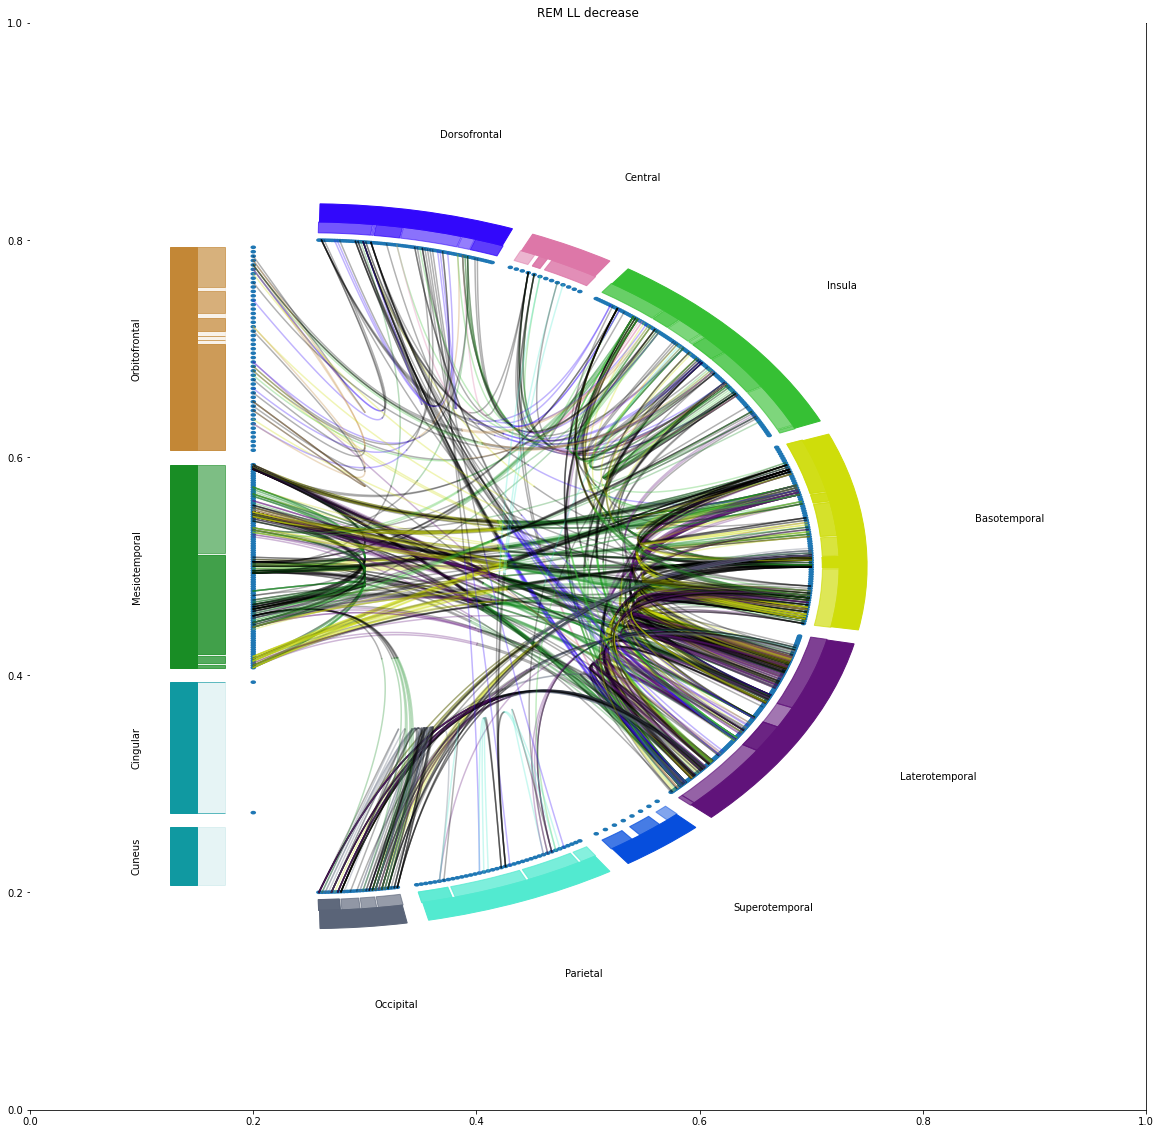

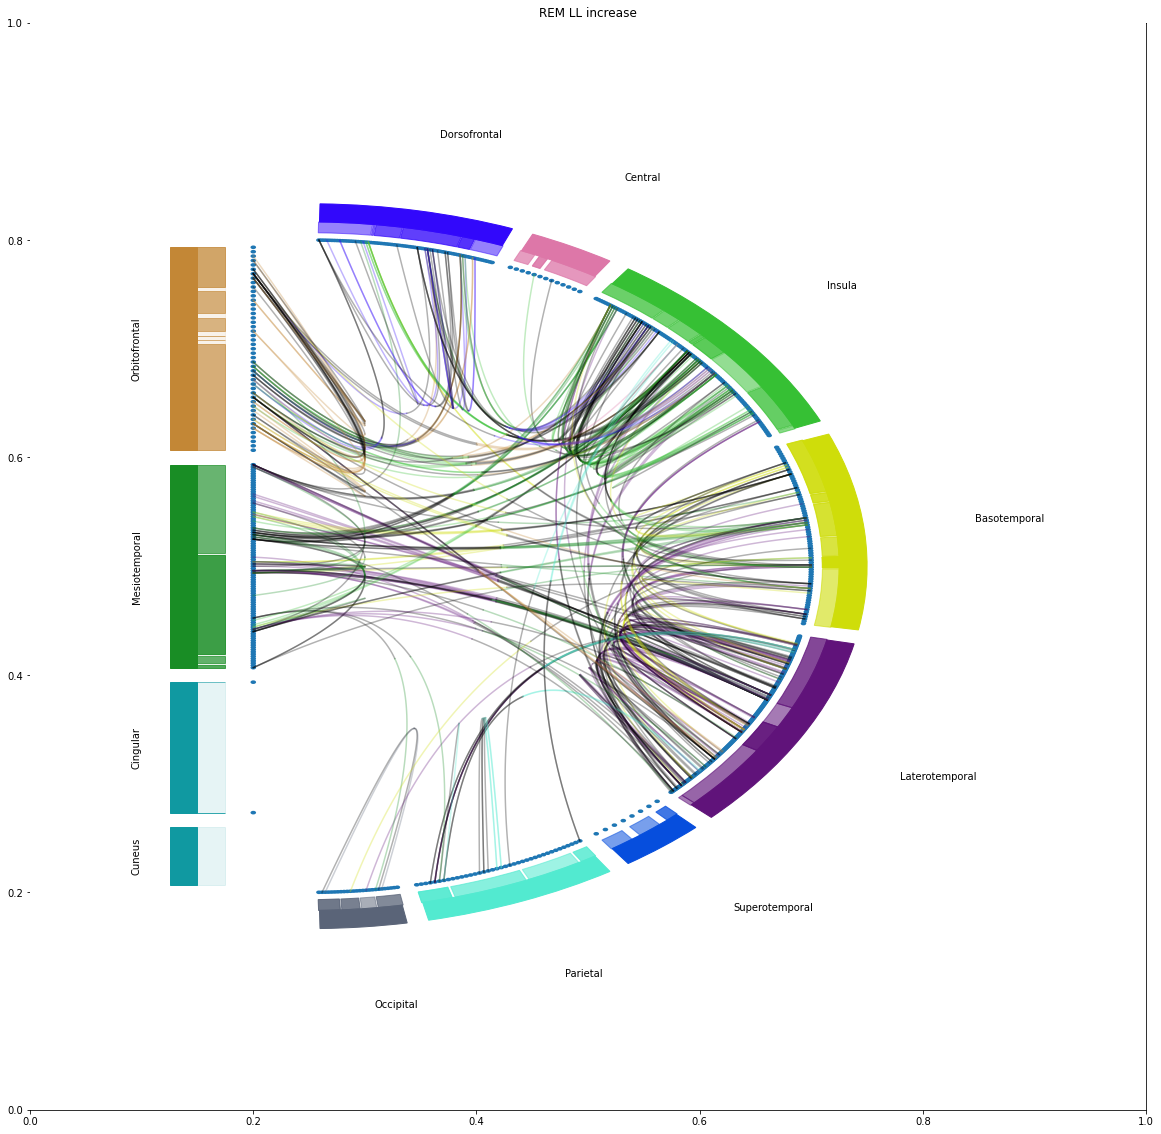

In [16]:
for e, label in zip([-1,1], ['decrease', 'increase']):
    data_edges = data_con[(data_con.d>10)&(data_con.REM_LL==e)]
    data_edges = data_edges.reset_index(drop=True)
    figsize = (20,20)
    fig = plt.figure(figsize=figsize)
    plt.title('REM LL '+label)
    ax = fig.add_subplot(1, 1, 1)
    figure_r.plot_nodes_jpt(ax)
    figure_r.plot_con_jpt(data_edges, ax)
    plt.savefig('X:\\4 e-Lab\\EvM\Projects\\EL_experiment\\Analysis\\Patients\\Across\\BrainMapping\\Sleep\\connectogram\\figures\\REM_LL_'+label+'.png', dpi=300)
    plt.show()

In [17]:
data_con

Subj StimA       ChanA   Stim           StimR           ChanR   Chan  \
0      EL010  HIPP     OTS_med    0.0   Mesiotemporal    Basotemporal    2.0   
1      EL010  HIPP         ITS    0.0   Mesiotemporal  Laterotemporal    6.0   
2      EL010  HIPP         ITS    0.0   Mesiotemporal  Laterotemporal    7.0   
3      EL010  HIPP    LatS_hor    0.0   Mesiotemporal          Insula   25.0   
4      EL010  HIPP  CircIS_sup    0.0   Mesiotemporal          Insula   32.0   
...      ...   ...         ...    ...             ...             ...    ...   
15591  EL021   MTG     OTS_med  878.0  Laterotemporal    Basotemporal  870.0   
15592  EL021   MTG     OTS_lat  878.0  Laterotemporal    Basotemporal  871.0   
15593  EL021   MTG     OTS_lat  878.0  Laterotemporal    Basotemporal  872.0   
15594  EL021   MTG     OTS_lat  878.0  Laterotemporal    Basotemporal  873.0   
15595  EL021   MTG         MTG  878.0  Laterotemporal  Laterotemporal  876.0   

       NREM_LL  REM_LL  NREM_P  REM_P       Sig    LL_sig        DI  H      d  \
0          NaN    -1.0     NaN    NaN  1.000000  8.664564  0.000000  0   7.00   
1          NaN     NaN     1.0    NaN  0.216667  3.174776 -0.353060  0  21.00   
2          NaN     NaN     NaN    NaN  0.409836  3.049142 -0.098943  0  24.50   
3          NaN     NaN    -1.0    NaN  0.189655  3.320290  1.000000  0  73.60   
4          NaN     NaN     NaN    NaN  0.147541  2.671695  1.000000  0  50.27   
...        ...     ...     ...    ...       ...       ...       ... ..    ...   
15591      NaN     NaN     NaN    NaN  0.991279  3.426465  0.271537  0  28.00   
15592      NaN     NaN     NaN    NaN  1.000000  4.591301  0.013288  0  24.50   
15593      NaN     NaN     NaN    NaN  1.000000  4.546755  0.000075  0  21.00   
15594      NaN     NaN     NaN    NaN  1.000000  5.443692 -0.000000  0  17.50   
15595      NaN     NaN     NaN    NaN  1.000000  7.940381 -0.000000  0   7.00   

       t_WOI  onset            Dist  
0      0.000  0.000  local (<15 mm)  
1      0.000  0.000   short (<30mm)  
2      0.004  0.000   short (<30mm)  
3      0.000  0.000            long  
4      0.142  0.144            long  
...      ...    ...             ...  
15591  0.000  0.009   short (<30mm)  
15592  0.000  0.008   short (<30mm)  
15593  0.000  0.005   short (<30mm)  
15594  0.000  0.000   short (<30mm)  
15595  0.000  0.000  local (<15 mm)  

[15596 rows x 19 columns]

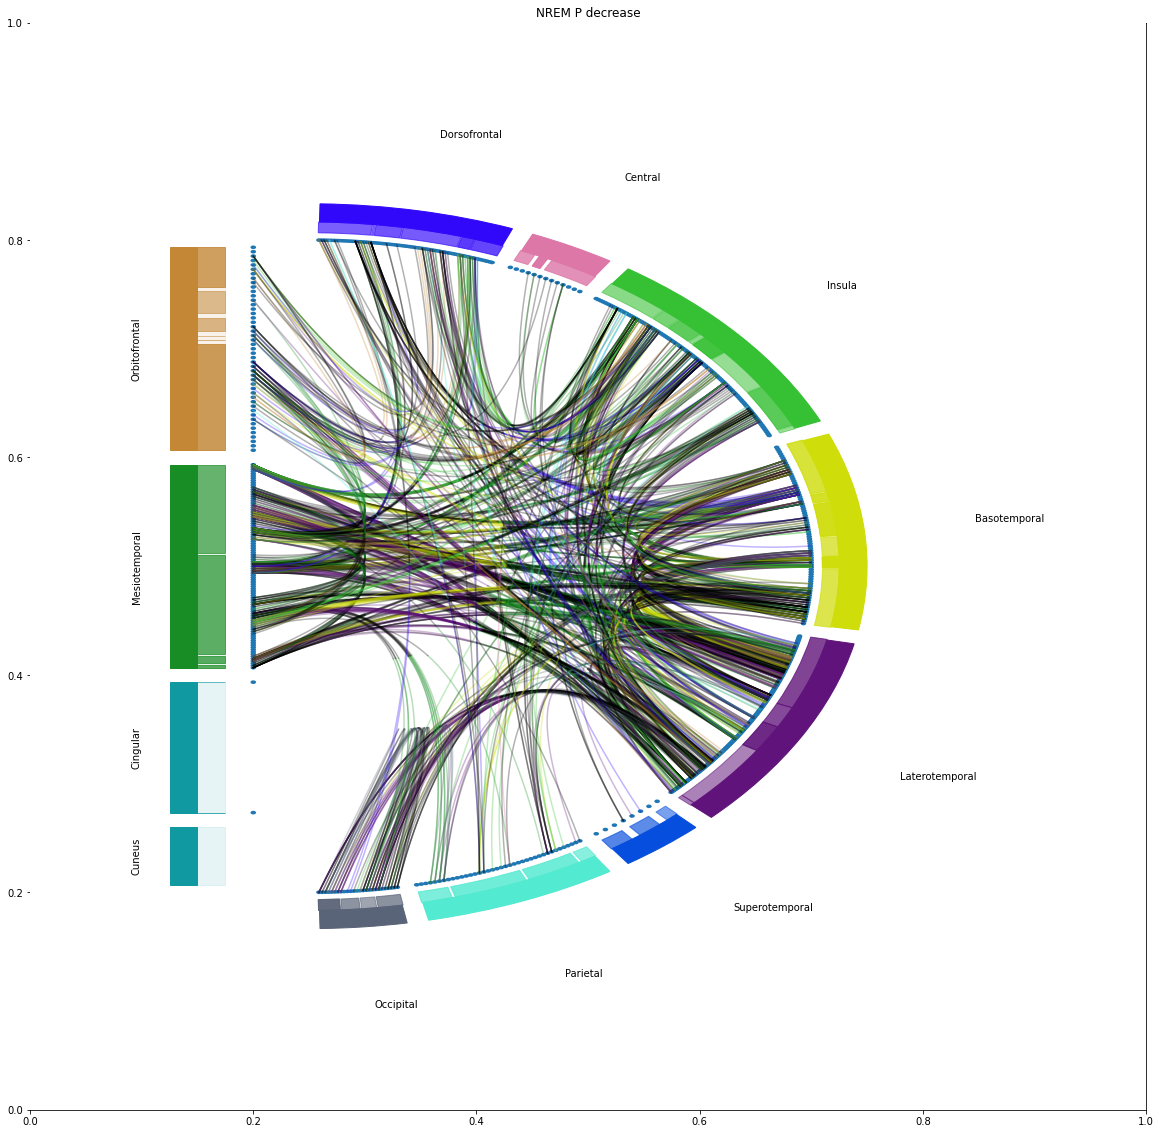

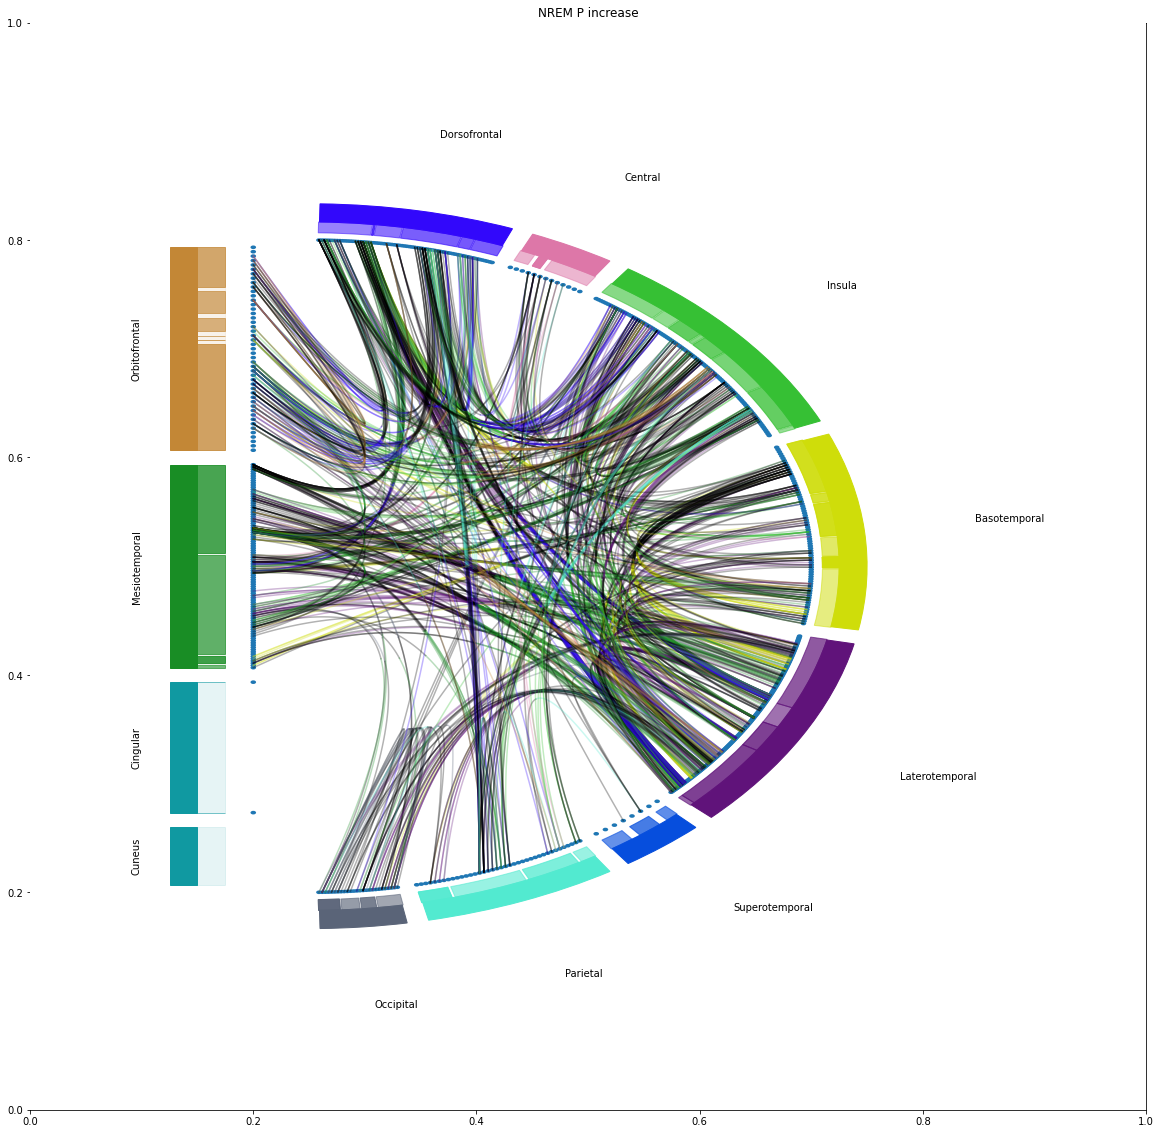

In [18]:
for e, label in zip([-1,1], ['decrease', 'increase']):
    data_edges = data_con[(data_con.d>10)&(data_con.NREM_P==e)]
    data_edges = data_edges.reset_index(drop=True)
    figsize = (20,20)
    fig = plt.figure(figsize=figsize)
    plt.title('NREM P '+label)
    ax = fig.add_subplot(1, 1, 1)
    figure_r.plot_nodes_jpt(ax)
    figure_r.plot_con_jpt(data_edges, ax)
    plt.savefig('X:\\4 e-Lab\\EvM\Projects\\EL_experiment\\Analysis\\Patients\\Across\\BrainMapping\\Sleep\\connectogram\\figures\\NREM_P_'+label+'.png', dpi=300)
    plt.show()

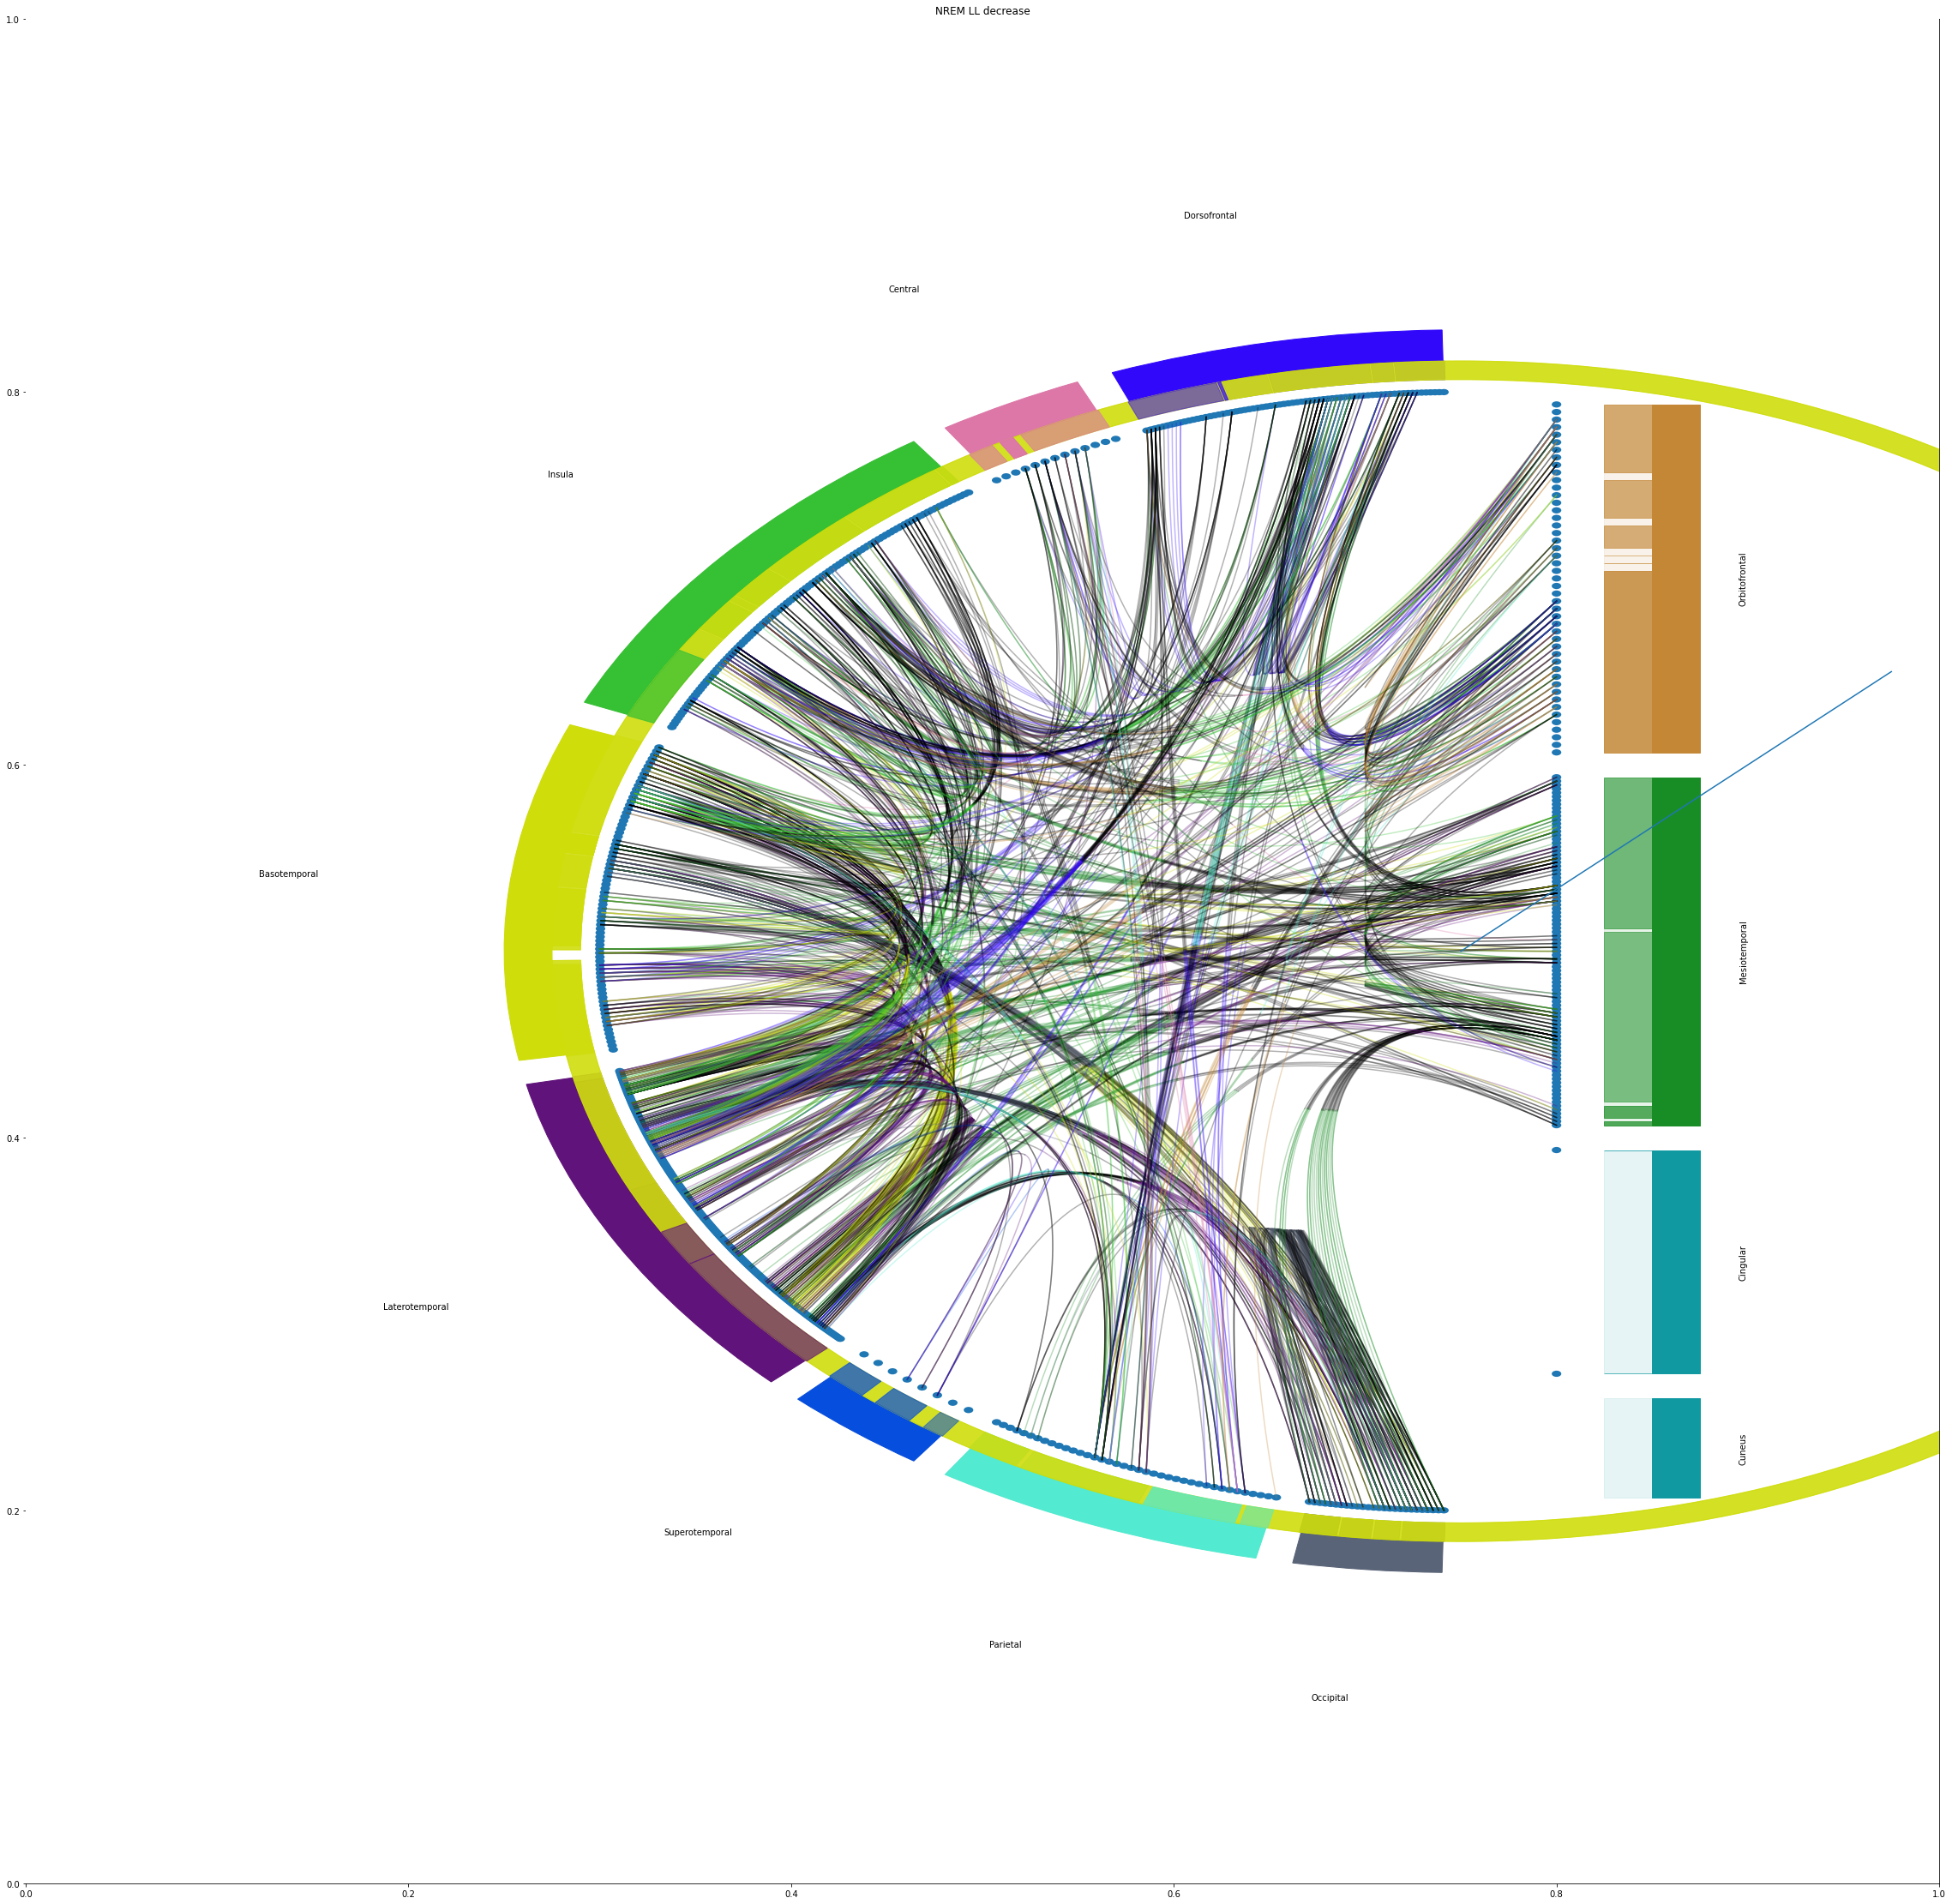

In [10]:
figsize = (40, 40)
fig = plt.figure(figsize=figsize)
plt.title('NREM LL decrease')
ax = fig.add_subplot(1, 1, 1)
figure_l.plot_nodes_jpt(ax)
figure_l.plot_con_jpt(data_edges, ax)
plt.show()


In [8]:
stop

NameError: name 'stop' is not defined

In [ ]:
plot_main = plot_connectogram.main_plot(data_con,data_nodes)

In [ ]:
data_edges = data_con[(data_con.d>80)&(data_con.d<100)&(data_con.Dir_index==1)]
data_edges = data_edges.reset_index(drop=True)
plot_main.plot_con(data_edges, ax = 0)